In [ ]:
# 获取网页内容， 在 html 中
import requests
r = requests.get("http://www.njtech.edu.cn", timeout = 3)
print(r.status_code)
r.encoding = "utf-8"
html = r.text

In [ ]:
# 解析网页内容
from bs4 import BeautifulSoup
txt= '''<html>
<head>
<title>我的第一个网页</title>
</head>
<body>
<div align="center" style="color:red;font-weight:bold;">
<p id="intro">风景</p>
<p id="njtech">南京工业大学</p>
</div>
</body>
</html> ''' #假设已经获取了网页源码
# soup 对象， ‘lxml’方法
soup = BeautifulSoup(txt, 'lxml')
#点取法， 针对一个点
tagP = soup.p
print(tagP.name, tagP.string, tagP.attrs)
print("tagP的id:",tagP['id'])

#获取文本  我的第一个网页
print(soup.title.string)

# div style 值
print(soup.div['style'])

In [ ]:
# find_all 和 find 

# 和课件上描述的有出入，存疑
print(soup.find_all('p'))

#获取所有 p 中文字
allP = soup.find_all('p')
for item in allP:
    print(item.string)

In [ ]:
soup.find_all(id="njtech")

In [ ]:
# 解析网页内容
from bs4 import BeautifulSoup

#"http://www.njtech.edu.cn/index/jjxy.htm"
#"http://www.njtech.edu.cn/index/jjxy/29.htm"
urlList = ["http://www.njtech.edu.cn/index/jjxy.htm"] + [ "http://www.njtech.edu.cn/index/jjxy/{}.htm".format(i) for i in range(29,20,-1)]

# 获取网页内容， 在 html 中
import requests
import io
import sys

#创建文件
strToWrite = ""
pageNo=0 #页数
for url in urlList:
    pageNo += 1
    r = requests.get(url, timeout = 3)
    r.encoding = "utf-8"
    txt = r.text #已经获取了网页源码

    # soup 对象， ‘lxml’方法
    soup = BeautifulSoup(txt, 'lxml')

    #获取标题 
    pageTitleItem = soup.find(id = "mainLeft").ul.find_all('a')
    pageTitle = []
    strToWrite += ("\n\n第{}页标题\n\n".format(pageNo))
    for item in pageTitleItem:
        pageTitle.append(item.string)
        strToWrite += (item.string)
        strToWrite += ('\n')
    strToWrite += ("-------------------------------------------------------------------")
   
# https://stackoverflow.com/questions/27092833/unicodeencodeerror-charmap-codec-cant-encode-characters
# 注意编码问题参考上面的链接
with open("D:/南京工业大学菁菁校园网站标题10页.txt","w+", encoding="utf-8") as f:
    f.write("南京工业大学菁菁校园网站标题10页\nhttp://www.njtech.edu.cn/index/jjxy.htm")
    f.write(strToWrite)
f.close()

**25条信息。信息包括影片名、类型、总票房、平均票价、场均人次、国家及地区、上映时间共7项,并且最后将这25条信息保存至一个文本文件中,每条信息的7项数据使用英文逗号分隔。**

In [ ]:
#导入
import requests
from bs4 import BeautifulSoup

url = 'http://www.cbooo.cn/year?year=2019'
#请求url
response = requests.get(url)

#获取text
html = response.text

soup = BeautifulSoup(html, 'lxml')
# 在 <table> <tr> 标签下
trs = soup.find('table', id='tbContent').find_all('tr')
strToWrite = ""
for tr in trs :
    #继续筛选，影片信息在<td> 中，抬头信息在<th>中
    #
    ls = [td.text.strip() for td in tr.find_all(['th','td'])]
    strToWrite += ','.join(ls) +"\n"
print(strToWrite)
with open("D:/中国票房网影院票房的2019年年度票房排行榜25.txt","w", encoding="utf-8") as f:
    f.write(strToWrite)
    f.close
    

## 袁驰大作业 
本次期末考核采用大作业的形式， 具体要求如下：<br> 
1. 自选一个或多个网站，爬取你感兴趣的数据（保存至文件），并作适当的数据分析（分析角度自拟），最后将分析结果以图形化的方式展示（使用MatplotLib库）。 <br>
2. 依据平时表现、爬取数据的数据量、复杂度、数据分析的角度、图形展示等决定最终的考核分数。 <br>
tips:<br>
- 爬取内容不可以是课件中的例题或者平时作业。 <br>
- 不可出现相互抄袭的现象，一经发现均视为不及格。<br>
- 不可将网上公布的爬虫实例源码作为大作业，一经发现均视为不及格。<br>
- 大作业上交的文档包括：源码（最好有适当的代码注释）、爬取数据保存的文本文件、其它你觉得需要提交的文档、PPT。其中PPT内容必须包含大作业的设计思路、运行界面截图、你的感想。 <br>
- 大作业上交的所有文档必须使用压缩软件压缩成一个文件，文件后缀名为rar。 <br>
- 大作业提交截止时间：2019-12-21 <br>

思路:
- 爬取[postcrossing](https://www.postcrossing.com/stats/topusers/alltime) 排名, 并统计国家, 捐助者. ALL-Time, Last 60 DAYS, BY DISTANCE 三者比较.
- 人均寄送数量, 用户占总人口比例
- 也可以分析个人用户数据(可选)
- 可以结合以上分析, 设定评价指标, 评比各国用户喜爱程度.


In [115]:
# 解析网页内容
from bs4 import BeautifulSoup
import requests
import io
import sys

#后缀 c 代表 countries 国家;   后缀 t 代表 topusers 名列前茅的用户

#https://www.postcrossing.com/stats/topusers/alltime
#https://www.postcrossing.com/explore/countries
url_c = r'https://www.postcrossing.com/explore/countries'
url_t = r'https://www.postcrossing.com/stats/topusers/alltime'

strToWrite_c = ''
strToWrite_t = ''

"""爬取各国信息"""
response_c = requests.get(url_c)
response_c.status_code

#获取text
html_c = response_c.text
soup_c = BeautifulSoup(html_c, 'lxml')
#在 <table> <tr> 标签下
trs_c = soup_c.find('table', id='countryList').find_all('tr')
#获取内容
for tr in trs_c :
    #继续筛选，各类信息均在<td> 中
    ls = [td.text.strip() for td in tr.find_all('td')]
    strToWrite_c += ','.join(ls) +"\n"
if strToWrite_c != '':
    print('ok')

"""爬取用户TOP100信息"""
response_t = requests.get(url_t)
response_t.status_code

#获取text
html_t = response_t.text
soup_t = BeautifulSoup(html_t, 'lxml')
#在 <table> <tr> 标签下
trs_t = soup_t.find('table').find_all('tr')
#获取内容
for tr in trs_t :
    #继续筛选，各类信息均在<td> 中
    ls = [td.text.strip() for td in tr.find_all('td')]
    strToWrite_t += ','.join(ls) +"\n"
if strToWrite_t != '':
    print('ok')
with open("D:/postcrossing.txt","w", encoding="utf-8") as f:
    f.write(strToWrite_c)
    f.write("\n-----------------------------------------------\n")
    f.write(strToWrite_t)
    f.close

ok
ok


In [116]:
# 解析网页内容
from bs4 import BeautifulSoup
import requests
import io
import sys

#后缀 c 代表 countries 国家;   后缀 t 代表 topusers 名列前茅的用户

#https://www.postcrossing.com/stats/topusers/alltime
#https://www.postcrossing.com/explore/countries
url_c = r'https://www.postcrossing.com/explore/countries'
url_t = r'https://www.postcrossing.com/stats/topusers/alltime'

strToWrite_c = ''
strToWrite_t = ''



In [117]:
"""爬取各国信息"""
response_c = requests.get(url_c)
response_c.status_code


200

In [118]:


#获取text
html_c = response_c.text
# html_c=""""""
soup_c = BeautifulSoup(html_c, 'lxml')
#在 <table> <tr> 标签下
trs_c = soup_c.find('table', id='countryList').find_all('tr')
#获取内容
contain_c=[]
for tr in trs_c[1:] :
    #继续筛选，各类信息均在<td> 中
    code, country, members, postcards, population = [td.text.strip().replace(',','') for td in tr.find_all('td')] #提取文字内容
    ls = [code, country, int(members), int(postcards), int(population)]
    contain_c.append(ls) # list形式存储
    strToWrite_c += ','.join([code, country, members, postcards, population]) +"\n"  #字符串形式, 方便写文件
if strToWrite_c != '':
    print('ok')


ok


In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
 
def draw_bar(country, sample, title, ylabel, xlabel):
    """
    python大作业
    用于绘制柱状图, 参数有原始信息contian, 需绘数据(list), 图表标题title, y轴标签, x轴坐标轴标注  
    """
    width = 0.6 #柱状图线宽
    lenSample = len(sample)
    ind = np.linspace(0.5,lenSample-0.5,lenSample) 
    # make a square figure
    fig = plt.figure(1)
    ax  = fig.add_subplot(111)
    labels = [i[0] for i in country]  #提取国家简写/用户姓名

    # 绘制柱形图, 参数: x坐标, y坐标, 柱宽, 颜色
    ax.bar(ind-width/2,sample,width,color='green')
    # 设置x轴string坐标
    ax.set_xticks(ind) #位置
    ax.set_xticklabels(labels) #string
    # labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # title
    ax.set_title(title, bbox={'facecolor':'0.8', 'pad':5})
    #显示网格
    plt.grid(True) 
    plt.xticks(rotation=60)  #设置文字旋转角度, 防重叠
    plt.show()
    plt.close()

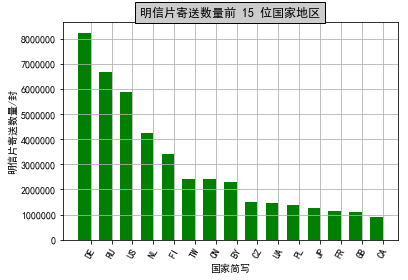

In [119]:
# 画图1 按各国明信片总数数递减
#排序, 使用 operator.itemgetter 
from operator import itemgetter 
sorted_cc = sorted(contain_c, key = itemgetter(3), reverse=True)
# print(sorted_cc)

#划定绘图范围
countryToPlot = sorted_cc[:15]

#画图
postNum = [i[3] for i in countryToPlot]
title = '明信片寄送数量前 {} 位国家地区'.format(len(postNum))
ylabel = '明信片寄送数量/封'  
xlabel = '国家简写'
draw_bar(countryToPlot, postNum, title, ylabel, xlabel)


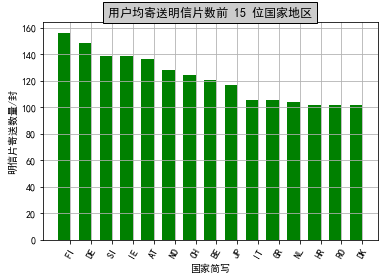

In [120]:
# 画图2 按各国用户均寄送明信片数递减

#计算用户均寄送明信片数 
sendPerUser = []
for i in contain_c:
    """
    因为存在一些游客影响, 部分国家地区用户均寄送数量畸变, 选取用户基数较大的国家, 减小影响.
    """
    if i[2]>=300:
        sendPerUser.append(i[:3]+[i[3]/i[2]])

#排序, 使用 operator.itemgetter 
from operator import itemgetter 
sorted_spu = sorted(sendPerUser, key = itemgetter(3), reverse=True)
# print(sorted_cc)

#划定绘图范围
countryToPlot = sorted_spu[:15]

#画图
# print(countryToPlot)
postNum = [i[3] for i in countryToPlot]
title = '用户均寄送明信片数前 {} 位国家地区'.format(len(postNum))
ylabel = '明信片寄送数量/封'  
xlabel = '国家简写'
draw_bar(countryToPlot, postNum, title, ylabel, xlabel)


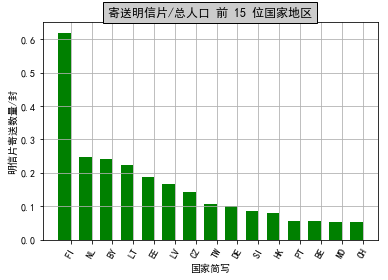

In [121]:
# 画图3 按各国人均寄送明信片数递减

#计算用户均寄送明信片数 
sendPerUser = []
for i in contain_c:
    if i[2]>=300:
        sendPerUser.append(i[:3]+[i[3]/i[4]])

#排序, 使用 operator.itemgetter 
from operator import itemgetter 
sorted_spu = sorted(sendPerUser, key = itemgetter(3), reverse=True)
# print(sorted_cc)

#划定绘图范围
countryToPlot = sorted_spu[:15]

#画图
# print(countryToPlot)
postNum = [i[3] for i in countryToPlot]
title = '寄送明信片/总人口 前 {} 位国家地区'.format(len(postNum))
ylabel = '明信片寄送数量/封'  
xlabel = '国家简写'
draw_bar(countryToPlot, postNum, title, ylabel, xlabel)


In [122]:
print('国家简写, 国家, 用户数, 明信片(寄), 人口')
print(strToWrite_c)

国家简写, 国家, 用户数, 明信片(寄), 人口
AF,Afghanistan,8,264,37172386
AX,Åland Islands (*),42,7189,26711
AL,Albania,8,754,2866376
DZ,Algeria,193,10508,42228429
AS,American Samoa (*),0,19,55465
AD,Andorra,16,881,77006
AO,Angola,1,50,30809762
AI,Anguilla (*),0,2,13254
AQ,Antarctica (*),1,42,0
AG,Antigua and Barbuda,7,191,96286
AR,Argentina,681,18835,44494502
AM,Armenia,60,8799,2951776
AW,Aruba (*),10,483,105845
AU,Australia,7297,641685,24992369
AT,Austria,3195,436323,8847037
AZ,Azerbaijan,117,6270,9942334
BS,Bahamas,23,4403,385640
BH,Bahrain,33,2300,1569439
BD,Bangladesh,51,2484,161356039
BB,Barbados,11,724,286641
BY,Belarus,30948,2283874,9485386
BE,Belgium,5168,622956,11422068
BZ,Belize,22,1622,383071
BJ,Benin,9,41,11485048
BM,Bermuda (*),19,1315,63968
BT,Bhutan,6,65,754394
BO,Bolivia,28,390,11353142
BQ,Bonaire Sint Eustatius and Saba (*),6,411,18012
BA,Bosnia and Herzegovina,167,8919,3323929
BW,Botswana,9,184,2254126
BR,Brazil,9351,439786,209469333
IO,British Indian Ocean Territory                  

In [123]:

"""爬取用户TOP100信息"""
response_t = requests.get(url_t)
response_t.status_code


200

In [124]:

#获取text
html_t = response_t.text
# html_t=""""""
soup_t = BeautifulSoup(html_t, 'lxml')
#在 <table> <tr> 标签下
trs_t = soup_t.find('table').find_all('tr')
#获取内容
contain_t = []
for tr in trs_t :
    #继续筛选，各类信息均在<td> 中
    _, _, name, country, numSent = [td.text.strip().replace(',','') for td in tr.find_all('td')] #提取文字内容
    ls = [name, country, int(numSent.split(' ')[0])]
    contain_t.append(ls) # list形式存储
    strToWrite_t += ','.join([name, country, numSent]) +"\n"  #字符串形式, 方便写文件
if strToWrite_t != '':
    print('ok')
# print(contain_t)
print(strToWrite_t)


ok
Willi,Germany,28387 postcards sent
klausdiemaus,Germany,26366 postcards sent
Minna71,Finland,24449 postcards sent
Nordbaer,Germany,24132 postcards sent
Antje321,Germany,20508 postcards sent
rosenbusch,Germany,19126 postcards sent
chrissybaby,Ireland,18190 postcards sent
fisherman,Ireland,18012 postcards sent
ned44440,Ireland,17845 postcards sent
artlover,Finland,17638 postcards sent
uttia4a,Germany,17569 postcards sent
korf,Netherlands,16685 postcards sent
Gogge1,Denmark,16538 postcards sent
ferro,Belgium,16502 postcards sent
wurzelchen,Germany,15934 postcards sent
hepman,Germany,15398 postcards sent
y12315259,Japan,14867 postcards sent
sktour,Japan,14490 postcards sent
elfie-luna,Germany,14165 postcards sent
didieroux2,France,14141 postcards sent
laban,Finland,14029 postcards sent
gordonsmummy,New Zealand,13761 postcards sent
nunoftferreira,Portugal,13661 postcards sent
Kizza00,Germany,13467 postcards sent
bogdanovskaya,Spain,13386 postcards sent
hmthompson,U.S.A.,13255 postcards s

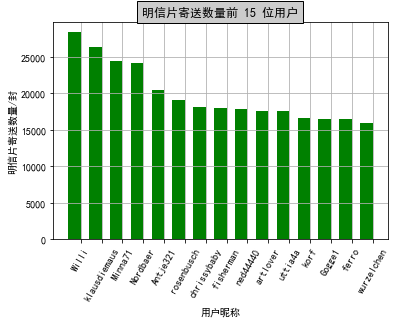

In [125]:
# 画图2-1 按用户明信片总数递减
#排序, 使用 operator.itemgetter  
sorted_uc = sorted(contain_t, key = itemgetter(2), reverse=True)
# print(sorted_uc)

#划定绘图范围
usersToPlot = sorted_uc[:15]

#画图
postNum = [i[2] for i in usersToPlot]
title = '明信片寄送数量前 {} 位用户'.format(len(postNum))
ylabel = '明信片寄送数量/封'  
xlabel = '用户昵称'
draw_bar(usersToPlot, postNum, title, ylabel, xlabel)


In [126]:
import numpy as np
    
def draw_pie(data, labels):
    """
    python 大作业
    输入参数 data数据, labels对应标签
    """
    ld = len(data)
    a=np.random.random(ld)
    # cmap = plt.get_cmap('gnuplot')
    # cs=[cmap(i) for i in np.linspace(0, 1.2, ld)]
    cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', 'violet', 'yellow', 'yellowgreen']
    # 多彩颜色设置方法
    plt.figure(figsize=(6,9)) #调节图形大小
    patches,text1,text2 = plt.pie(data,
                        labels=labels,
                        colors=cs,
                        autopct = '%3.1f%%', #数值保留固定小数位
                        shadow = False, #无阴影设置
                        startangle =90, #逆时针起始角度设置
                        pctdistance = 0.6) #数值距圆心半径倍数的距离
    # x，y轴刻度设置一致，保证饼图为圆形
    plt.axis('equal')
    plt.show()


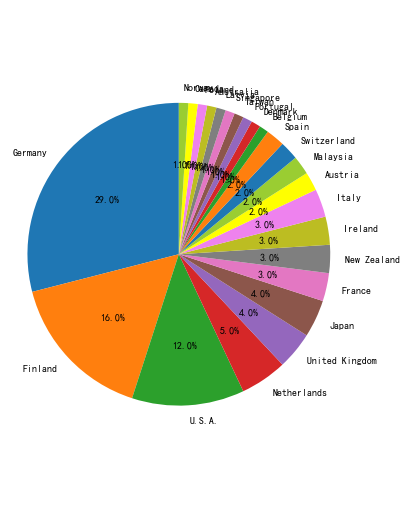

In [127]:
# 画图2-2 寄送数量前100用户国别统计

#将统计排序好的 list, 因为有用户数和用户寄件总数, 仅使用 dict 辅助
userCountry = list(set([i[1] for i in contain_t]))
u1 = dict()
u2 = dict()
for _, country, num in contain_t:
    #统计各国用户数
    if country in u1: 
        u1[country] += 1
    else:
        u1[country] = 1
    #统计各国寄件总数
    if country in u2: 
        u2[country] += num
    else:
        u2[country] = num
userCountryCount = []
for i in userCountry:
     # userCountryCount 结构: 国家, 统计用户数, 寄件总数
    userCountryCount.append([i, u1[i], u2[i]]) 

#对用户数进行排序, 使用 operator.itemgetter   user country count
sorted_ucc = sorted(userCountryCount, key = itemgetter(1), reverse=True)
#print(sorted_ucc)

data = [i[1] for i in sorted_ucc]  #国家名称
labels = [i[0] for i in sorted_ucc] #对应top用户数
draw_pie(data, labels)

#上图详实, 但是并不美观
#规整数据, 将用户数少于3的国家统计为其他
normal_ucc = []
others = ['others', 0, 0]
for i in sorted_ucc:
    if i[1] >= 3: 
        normal_ucc.append(i)
    else:
        others[1] += i[1]
        others[2] += i[2]
normal_ucc.append(others)



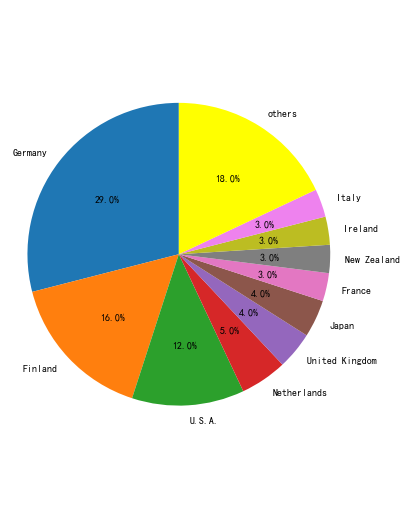

In [128]:
#规整之后按用户绘图
data = [i[1] for i in normal_ucc]  #对应top用户数
labels = [i[0] for i in normal_ucc] #国家名称
draw_pie(data, labels)

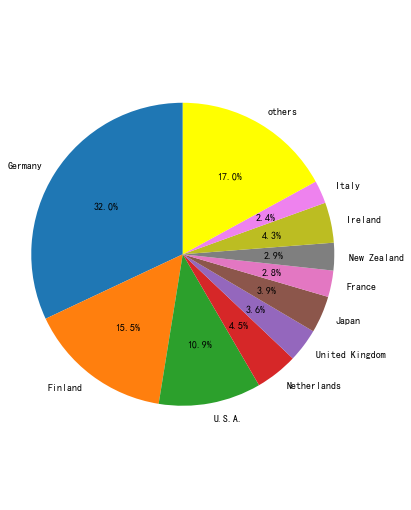

In [130]:
#规整之后按top用户总寄件数绘图
data = [i[2] for i in normal_ucc]  #top用户寄件数
labels = [i[0] for i in normal_ucc] #国家名称 
draw_pie(data, labels)

In [114]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim()
# location = geolocator.geocode("北京天安门")
# print(location.address)